In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
#Classification Algorithm  : means to predict the categorical type data means to predict the value
#of yes /no , True/False etc 
#1. Logistic Regression 
#dataset : insurance.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("insurance.csv")
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [4]:
#female :  0   male : 1 
#bmi : body mass index 


In [5]:
#How many rows and columns in given dataset
df.shape

(1338, 8)

In [6]:
#Check how many samples of 0's and 1's 
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

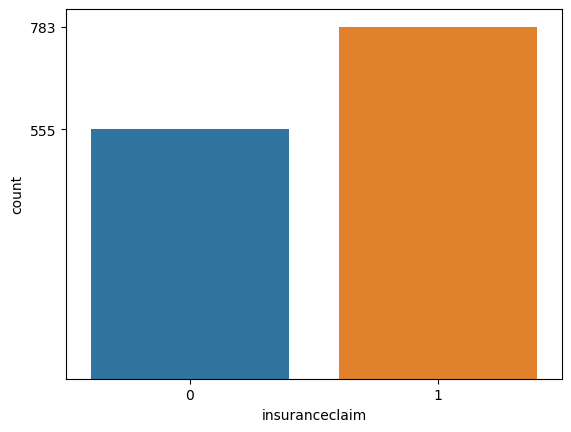

In [7]:
#visualisation :
sns.countplot(data=df,x='insuranceclaim')
f=df["insuranceclaim"].value_counts()
plt.yticks(f)
plt.show()

In [8]:
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [9]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [11]:
df['region'].value_counts()
#North ,South,East,West  
#1. East : 0  , North : 1   South : 2   West : 3

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [12]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [13]:
#To check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

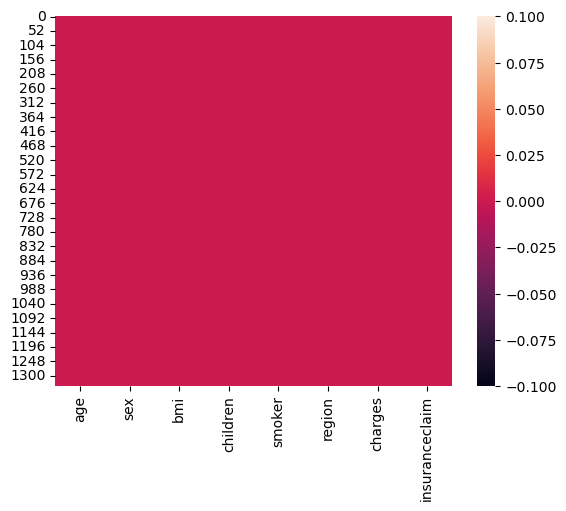

In [14]:
#visualisation
sns.heatmap(df.isnull())
plt.show()

In [15]:
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [16]:
#cross check
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [17]:
#To Check duplicates rows/records
df.duplicated().sum()

1

In [18]:
#To show details of duplicates rows
df[df.duplicated()]

age  sex    bmi  children  smoker  region    charges  insuranceclaim
581   19    1  30.59         0       0       1  1639.5631               1

In [19]:
#to remove duplicates rows/records permanently from given dataframe
df.drop_duplicates(inplace=True)

In [20]:
#To Check duplicates rows/records
df.duplicated().sum()

0

In [21]:
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [22]:
#select input and output from given dataframe 
#So first select he input and output:-
X=df.drop('insuranceclaim',axis=1) #select input
Y=df['insuranceclaim'] #select output

In [25]:
#Tain test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
#apply StandardScaler on X-train and X-test 
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [27]:
#Perform the model with the help of logistic Regression
from sklearn.linear_model import LogisticRegression

In [28]:
#create the model of logisticRegression
lr=LogisticRegression()

In [29]:
#train the model with 70% data,use inbuilt method fit() of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [30]:
#Test the model with 30%,use predict() inbuilt method of 
#LogisticRegression() : Y_pred=1/(1+np.exp(-x_test))
Y_pred=lr.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
#Check the model score like r2_score in linear but here its accuracy score(0-1)
#use inbuilt method score() which define in LogisticRegression class
lr.score(X_test,Y_test)  #it is Accuracy score

0.8855721393034826